# Housing Project

In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Importing the dataset and read the csv files
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
#Checking shape of train dataset
train_df.shape

(1168, 81)

There are 1168 rows and 81 columns in dataset.

In [4]:
#Checking shape of test dataset
test_df.shape

(292, 80)

There are 292 rows and 80 columns in dataset.

In [5]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [6]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [7]:
#Checking the data types of all columns
train_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

Dataset contain int64, object, float64 datatype.

In [9]:
test_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object

Dataset contain int64, object, float64 datatype.

<AxesSubplot:>

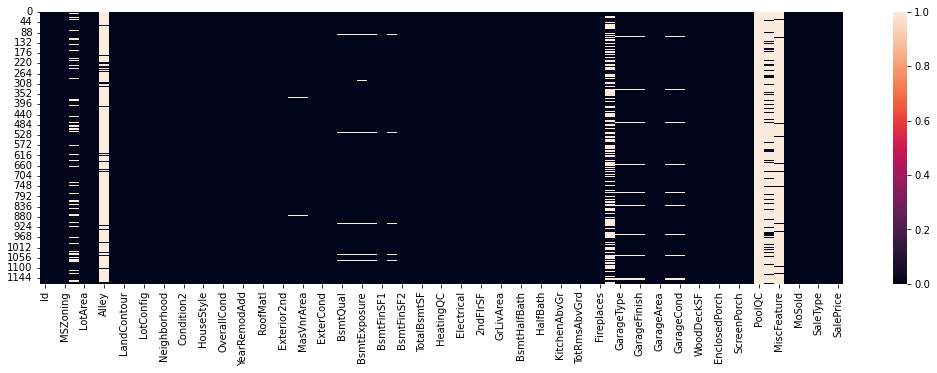

In [12]:
# checking null value using heatmap for train set
plt.figure(figsize = (18,5))
sns.heatmap(train_df.isnull())

<AxesSubplot:>

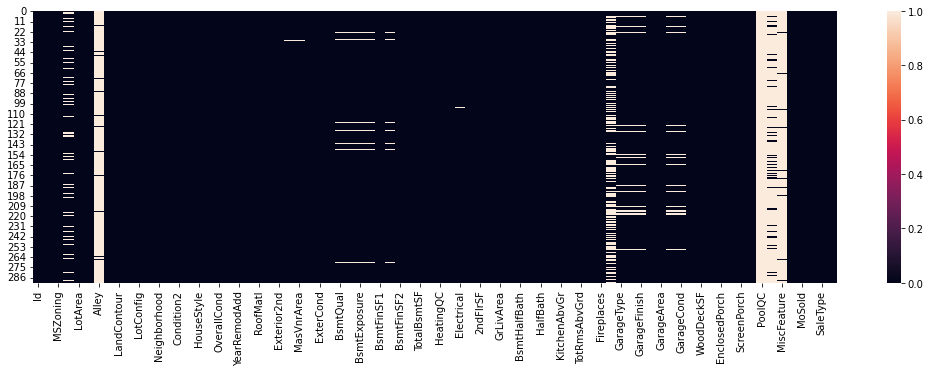

In [13]:
# checking null value using heatmap for test set
plt.figure(figsize = (18,5))
sns.heatmap(test_df.isnull())

Both the dataset contain Null values.

In [14]:
#dropping ID column 
train_df=train_df.drop(['Id'],axis=1)
test_df=test_df.drop(['Id'],axis=1)

# Replacing the Null values of object column with mode and non object value with mean

In [15]:
#creating list for object and non object columns for train data sets
train_objcols=[]
train_numcols=[]
for col in train_df.columns:
    if (train_df[col].dtype=='object'):
          train_objcols.append(col)
    else:
        train_numcols.append(col)

In [16]:
#creating list for object and non object columns for test data sets
test_objcols=[]
test_numcols=[]
for col in test_df.columns:
    if (test_df[col].dtype=='object'):
          test_objcols.append(col)
    else:
        test_numcols.append(col)

In [17]:
#Replacing null values of object column with mode of it.
import numpy as np
collist=train_df.columns.values
for i in range(0,len(collist)):
    if train_df[collist[i]].dtype == "object":
        train_df[collist[i]].fillna(train_df[collist[i]].mode()[0], inplace=True)

In [18]:
#Replacing null values of object column with mode of it.
import numpy as np
collist=test_df.columns.values
for i in range(0,len(collist)):
    if test_df[collist[i]].dtype == "object":
        test_df[collist[i]].fillna(test_df[collist[i]].mode()[0], inplace=True)

In [19]:
#Replacing non object values i.e. int64 and float64 null values with mean of it.
import numpy as np
collist=train_df.columns.values
for i in range(0,len(collist)):
    if train_df[collist[i]].dtype != "object":
        train_df[collist[i]].fillna(train_df[collist[i]].mean(), inplace=True)

In [20]:
#Replacing non object values i.e. int64 and float64 null values with mean of it.
import numpy as np
collist=test_df.columns.values
for i in range(0,len(collist)):
    if test_df[collist[i]].dtype != "object":
        test_df[collist[i]].fillna(test_df[collist[i]].mean(), inplace=True)

<AxesSubplot:>

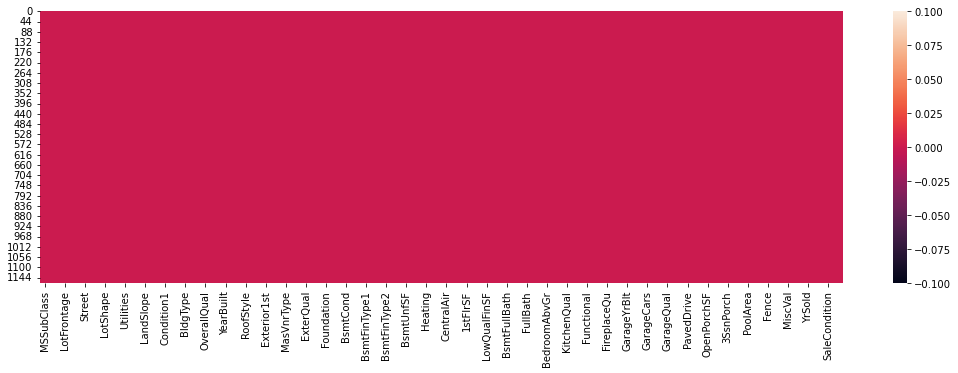

In [21]:
plt.figure(figsize = (18,5))
sns.heatmap(train_df.isnull()) #Looking for null values if any, in heatmap

Now, In both the dataset their is no null values.

In [22]:
pd.set_option('display.max_rows', None)
print(test_df.isnull().sum(axis = 0))

MSSubClass         0
MSZoning           0
LotFrontage        0
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

In [23]:
# Drop the PoolQC column from both the datasets.
test_df.drop('PoolQC',axis=1,inplace=True)

In [24]:
train_df.drop('PoolQC',axis=1,inplace=True)

<AxesSubplot:>

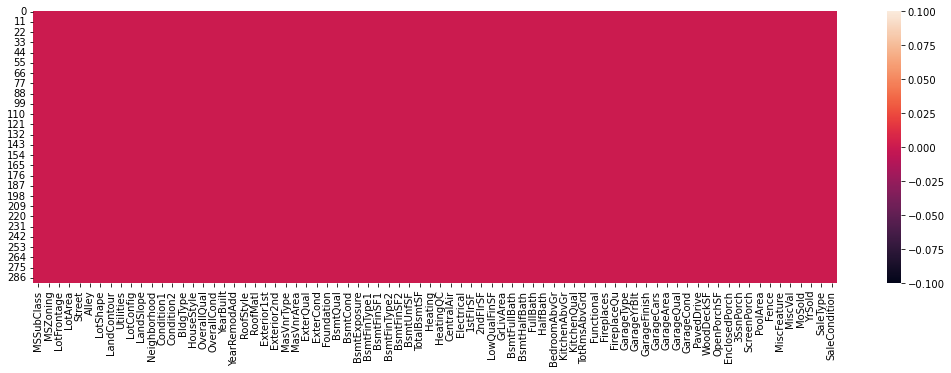

In [25]:
plt.figure(figsize = (18,5))
sns.heatmap(test_df.isnull()) #Looking for null values if any, in heatmap

In [26]:
# Converting years to age in train data
train_df['Year_SinceBuilt'] = train_df['YearBuilt'].max() - train_df['YearBuilt']
train_df['Year_SinceRemodAdded'] = train_df['YearRemodAdd'].max() - train_df['YearRemodAdd']
train_df['Yr_SinceSold'] = train_df['YrSold'].max() - train_df['YrSold']
train_df['GarageBlt_since'] = train_df['GarageYrBlt'].max() - train_df['GarageYrBlt']

# Dropping columns the existing columns
train_df.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

In [27]:
# Converting years to age in test data
test_df['Year_SinceBuilt'] = test_df['YearBuilt'].max() - test_df['YearBuilt']
test_df['Year_SinceRemodAdded'] = test_df['YearRemodAdd'].max() - test_df['YearRemodAdd']
test_df['Yr_SinceSold'] = test_df['YrSold'].max() - test_df['YrSold']
test_df['GarageBlt_since'] = test_df['GarageYrBlt'].max() - test_df['GarageYrBlt']

# Dropping columns
test_df.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

In [29]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Year_SinceBuilt,Year_SinceRemodAdded,Yr_SinceSold,GarageBlt_since
0,120,RL,70.98847,4928,Pave,Grvl,IR1,Lvl,AllPub,Inside,...,Shed,0,2,WD,Normal,128000,34,34,3,33.0
1,20,RL,95.00000,15865,Pave,Grvl,IR1,Lvl,AllPub,Inside,...,Shed,0,10,WD,Normal,268000,40,40,3,40.0
2,60,RL,92.00000,9920,Pave,Grvl,IR1,Lvl,AllPub,CulDSac,...,Shed,0,6,WD,Normal,269790,14,13,3,13.0
3,20,RL,105.00000,11751,Pave,Grvl,IR1,Lvl,AllPub,Inside,...,Shed,0,1,COD,Normal,190000,33,33,0,33.0
4,20,RL,70.98847,16635,Pave,Grvl,IR1,Lvl,AllPub,FR2,...,Shed,0,6,WD,Normal,215000,33,10,1,33.0


In [30]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,Year_SinceBuilt,Year_SinceRemodAdded,Yr_SinceSold,GarageBlt_since
0,20,RL,86.000000,14157,Pave,Grvl,IR1,HLS,AllPub,Corner,...,MnPrv,Shed,0,7,WD,Normal,4,4,3,5.0
1,120,RL,66.425101,5814,Pave,Grvl,IR1,Lvl,AllPub,CulDSac,...,MnPrv,Shed,0,8,COD,Abnorml,25,26,1,26.0
2,20,RL,66.425101,11838,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,MnPrv,Shed,0,6,WD,Normal,8,9,1,9.0
3,70,RL,75.000000,12000,Pave,Grvl,Reg,Bnk,AllPub,Inside,...,MnPrv,Shed,0,7,WD,Normal,68,60,1,69.0
4,60,RL,86.000000,14598,Pave,Grvl,IR1,Lvl,AllPub,CulDSac,...,MnPrv,Shed,0,1,WD,Normal,2,3,2,3.0


In [31]:
#As the data types have been modified,updating the list
#creating list for object and non object columns for test data sets
test_objcols=[]
test_numcols=[]
for col in test_df.columns:
    if (test_df[col].dtype=='object'):
          test_objcols.append(col)
    else:
        test_numcols.append(col)
#creating list for object and non object columns for train data sets
train_objcols=[]
train_numcols=[]
for col in train_df.columns:
    if (train_df[col].dtype=='object'):
          train_objcols.append(col)
    else:
        train_numcols.append(col)

In [33]:
train_df.dtypes

MSSubClass                int64
MSZoning                 object
LotFrontage             float64
LotArea                   int64
Street                   object
Alley                    object
LotShape                 object
LandContour              object
Utilities                object
LotConfig                object
LandSlope                object
Neighborhood             object
Condition1               object
Condition2               object
BldgType                 object
HouseStyle               object
OverallQual               int64
OverallCond               int64
RoofStyle                object
RoofMatl                 object
Exterior1st              object
Exterior2nd              object
MasVnrType               object
MasVnrArea              float64
ExterQual                object
ExterCond                object
Foundation               object
BsmtQual                 object
BsmtCond                 object
BsmtExposure             object
BsmtFinType1             object
BsmtFinS

In [32]:
test_df.dtypes

MSSubClass                int64
MSZoning                 object
LotFrontage             float64
LotArea                   int64
Street                   object
Alley                    object
LotShape                 object
LandContour              object
Utilities                object
LotConfig                object
LandSlope                object
Neighborhood             object
Condition1               object
Condition2               object
BldgType                 object
HouseStyle               object
OverallQual               int64
OverallCond               int64
RoofStyle                object
RoofMatl                 object
Exterior1st              object
Exterior2nd              object
MasVnrType               object
MasVnrArea              float64
ExterQual                object
ExterCond                object
Foundation               object
BsmtQual                 object
BsmtCond                 object
BsmtExposure             object
BsmtFinType1             object
BsmtFinS

# Data Visualization

<AxesSubplot:xlabel='ExterQual', ylabel='SalePrice'>

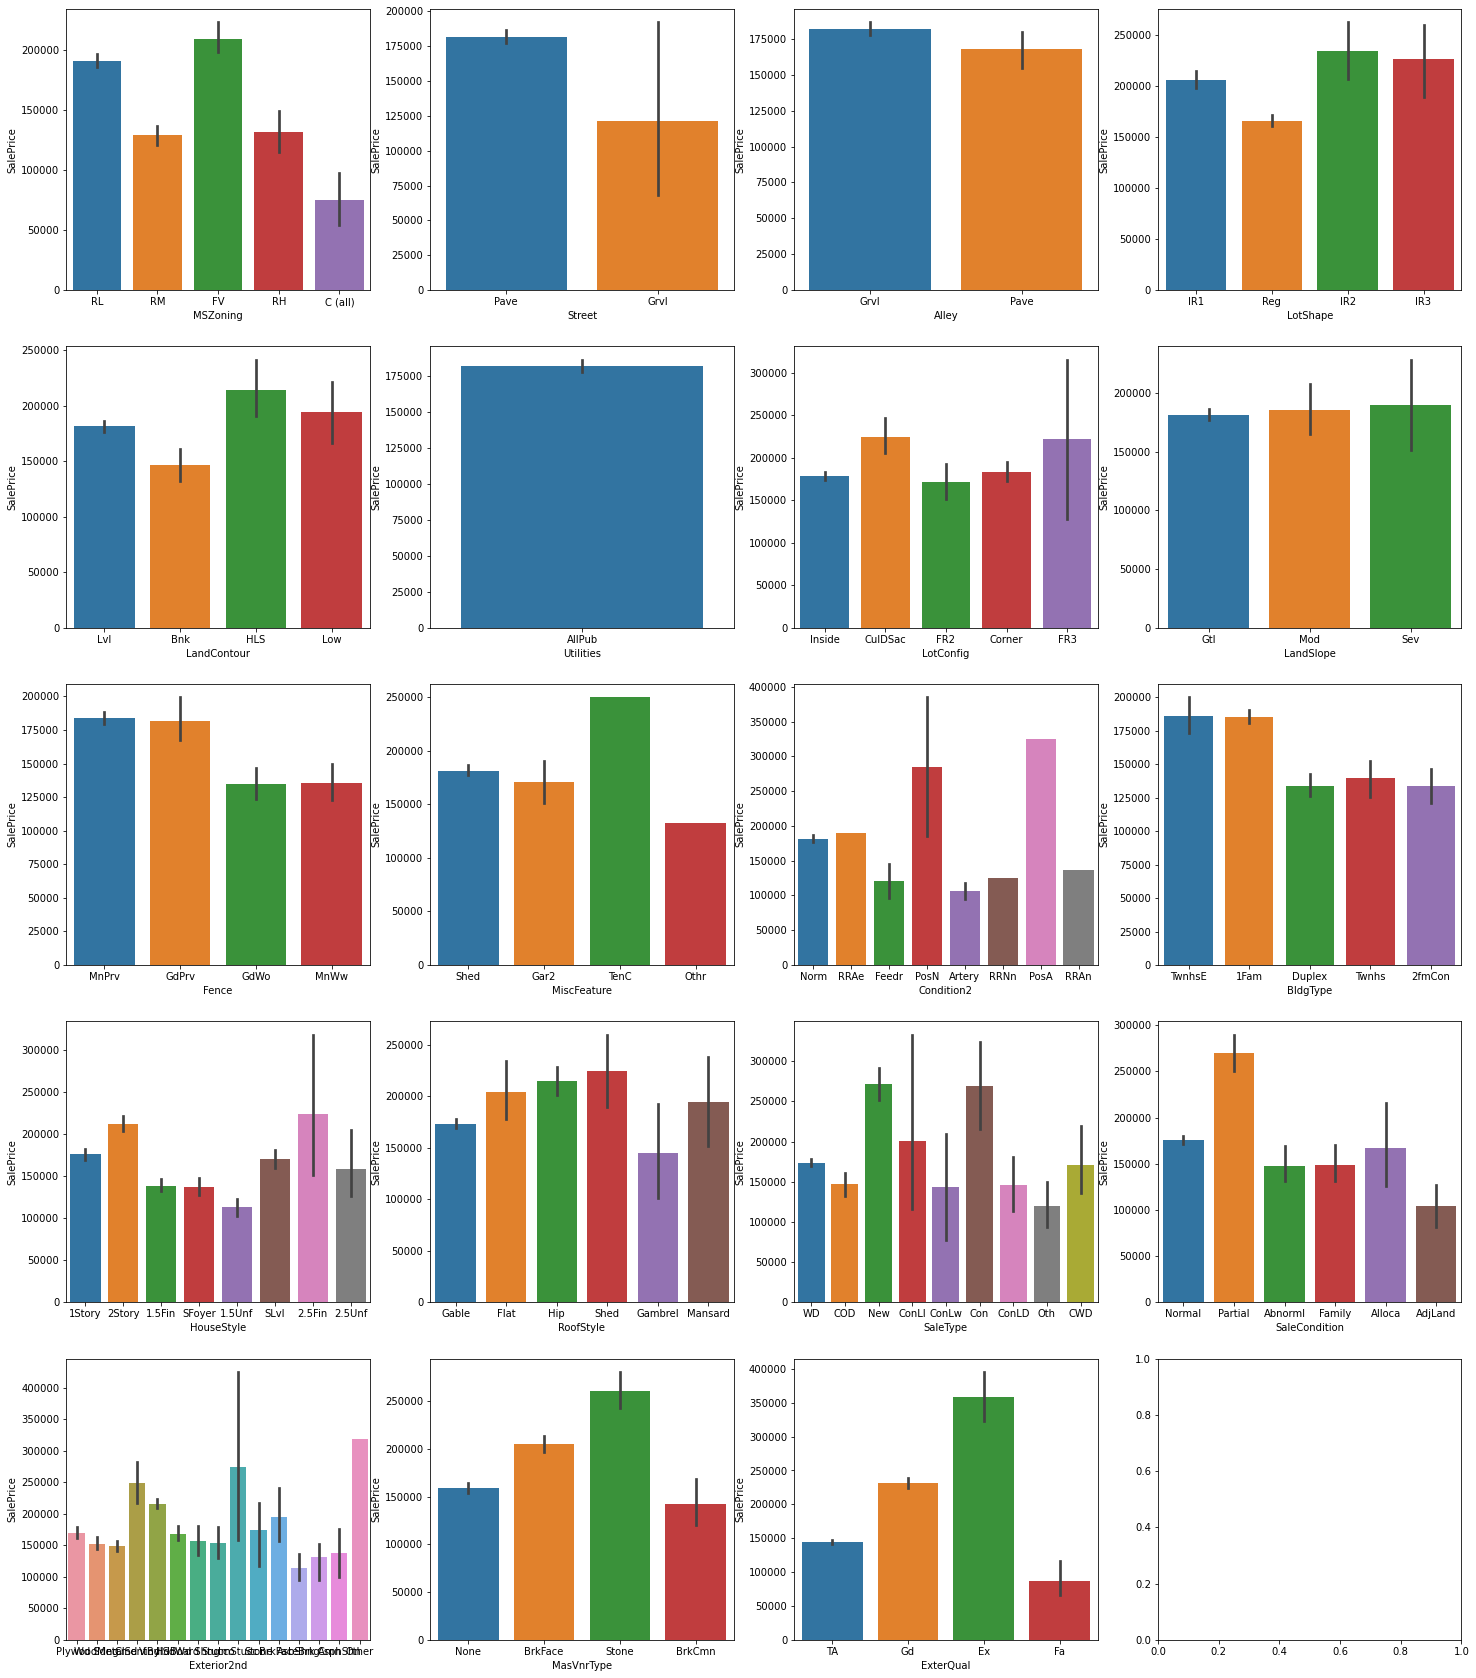

In [34]:
fig, ((ax1, ax2, ax3,ax4),(ax5, ax6,ax7,ax8),(ax9,ax10,ax11,ax12),(ax13,ax14,ax15,ax16),(ax17,ax18,ax19,ax20)) = plt.subplots(nrows=5, ncols=4, figsize = (25,30))

sns.barplot(x=train_df['MSZoning'],y=train_df['SalePrice'],ax=ax1)


sns.barplot(x=train_df['Street'],y=train_df['SalePrice'],ax=ax2)
sns.barplot(x=train_df['Alley'],y=train_df['SalePrice'],ax=ax3)
sns.barplot(x=train_df['LotShape'],y=train_df['SalePrice'],ax=ax4)
sns.barplot(x=train_df['LandContour'],y=train_df['SalePrice'],ax=ax5)

sns.barplot(x=train_df['Utilities'],y=train_df['SalePrice'],ax=ax6)
sns.barplot(x=train_df['LotConfig'],y=train_df['SalePrice'],ax=ax7)
sns.barplot(x=train_df['LandSlope'],y=train_df['SalePrice'],ax=ax8)
sns.barplot(x=train_df['Fence'],y=train_df['SalePrice'],ax=ax9)
sns.barplot(x=train_df['MiscFeature'],y=train_df['SalePrice'],ax=ax10)

sns.barplot(x=train_df['Condition2'],y=train_df['SalePrice'],ax=ax11)
sns.barplot(x=train_df['BldgType'],y=train_df['SalePrice'],ax=ax12)
sns.barplot(x=train_df['HouseStyle'],y=train_df['SalePrice'],ax=ax13)
sns.barplot(x=train_df['RoofStyle'],y=train_df['SalePrice'],ax=ax14)
sns.barplot(x=train_df['SaleType'],y=train_df['SalePrice'],ax=ax15)

sns.barplot(x=train_df['SaleCondition'],y=train_df['SalePrice'],ax=ax16)
sns.barplot(x=train_df['Exterior2nd'],y=train_df['SalePrice'],ax=ax17)
sns.barplot(x=train_df['MasVnrType'],y=train_df['SalePrice'],ax=ax18)
sns.barplot(x=train_df['ExterQual'],y=train_df['SalePrice'],ax=ax19)

<AxesSubplot:xlabel='PavedDrive', ylabel='SalePrice'>

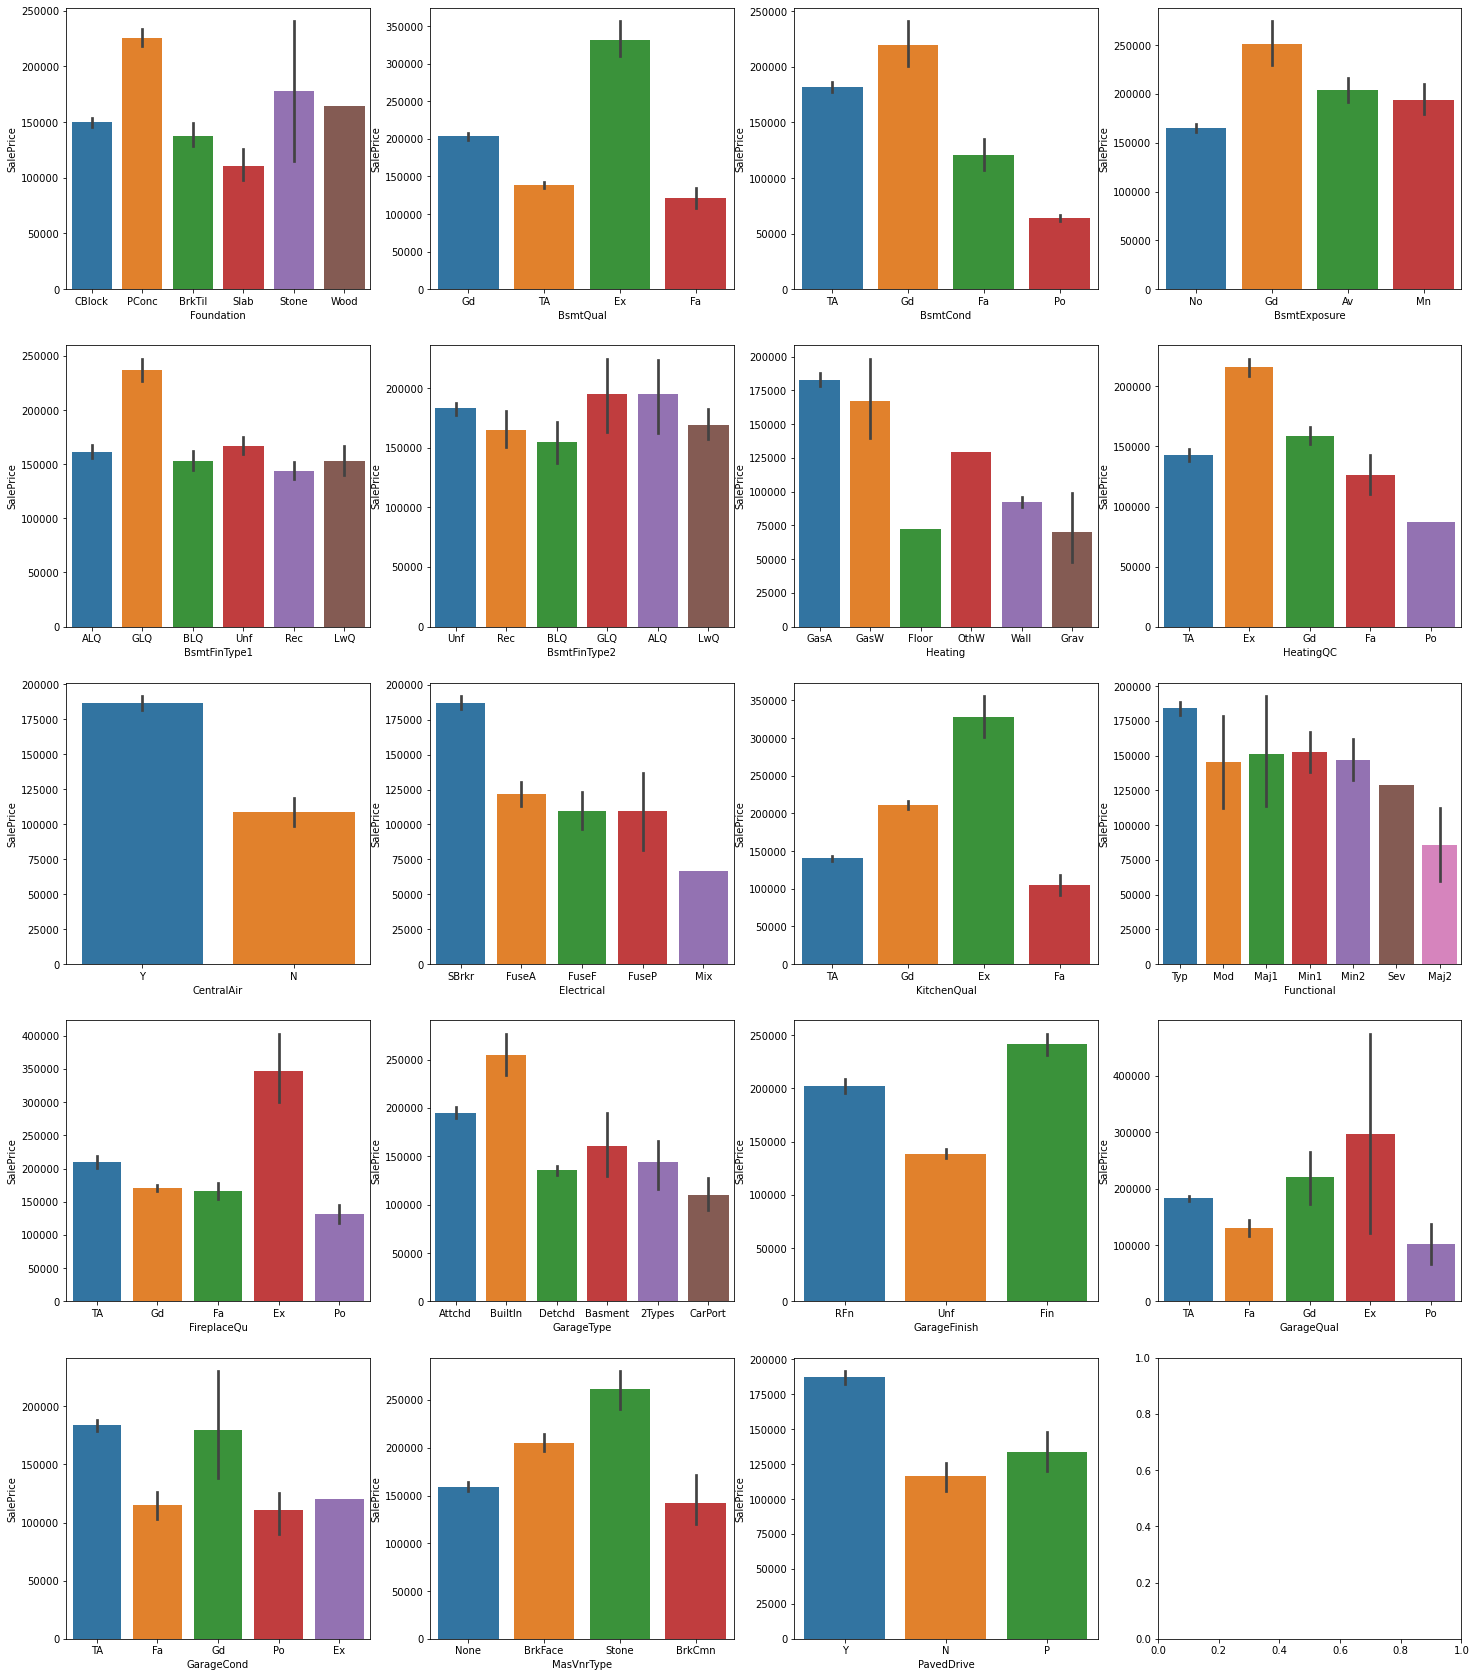

In [35]:
fig, ((ax1, ax2, ax3,ax4),(ax5, ax6,ax7,ax8),(ax9,ax10,ax11,ax12),(ax13,ax14,ax15,ax16),(ax17,ax18,ax19,ax20)) = plt.subplots(nrows=5, ncols=4, figsize = (25,30))
sns.barplot(x=train_df['Foundation'],y=train_df['SalePrice'],ax=ax1)


sns.barplot(x=train_df['BsmtQual'],y=train_df['SalePrice'],ax=ax2)
sns.barplot(x=train_df['BsmtCond'],y=train_df['SalePrice'],ax=ax3)
sns.barplot(x=train_df['BsmtExposure'],y=train_df['SalePrice'],ax=ax4)
sns.barplot(x=train_df['BsmtFinType1'],y=train_df['SalePrice'],ax=ax5)

sns.barplot(x=train_df['BsmtFinType2'],y=train_df['SalePrice'],ax=ax6)
sns.barplot(x=train_df['Heating'],y=train_df['SalePrice'],ax=ax7)
sns.barplot(x=train_df['HeatingQC'],y=train_df['SalePrice'],ax=ax8)
sns.barplot(x=train_df['CentralAir'],y=train_df['SalePrice'],ax=ax9)
sns.barplot(x=train_df['Electrical'],y=train_df['SalePrice'],ax=ax10)

sns.barplot(x=train_df['KitchenQual'],y=train_df['SalePrice'],ax=ax11)
sns.barplot(x=train_df['Functional'],y=train_df['SalePrice'],ax=ax12)
sns.barplot(x=train_df['FireplaceQu'],y=train_df['SalePrice'],ax=ax13)
sns.barplot(x=train_df['GarageType'],y=train_df['SalePrice'],ax=ax14)
sns.barplot(x=train_df['GarageFinish'],y=train_df['SalePrice'],ax=ax15)

sns.barplot(x=train_df['GarageQual'],y=train_df['SalePrice'],ax=ax16)
sns.barplot(x=train_df['GarageCond'],y=train_df['SalePrice'],ax=ax17)
sns.barplot(x=train_df['MasVnrType'],y=train_df['SalePrice'],ax=ax18)
sns.barplot(x=train_df['PavedDrive'],y=train_df['SalePrice'],ax=ax19)

<AxesSubplot:xlabel='MiscVal', ylabel='SalePrice'>

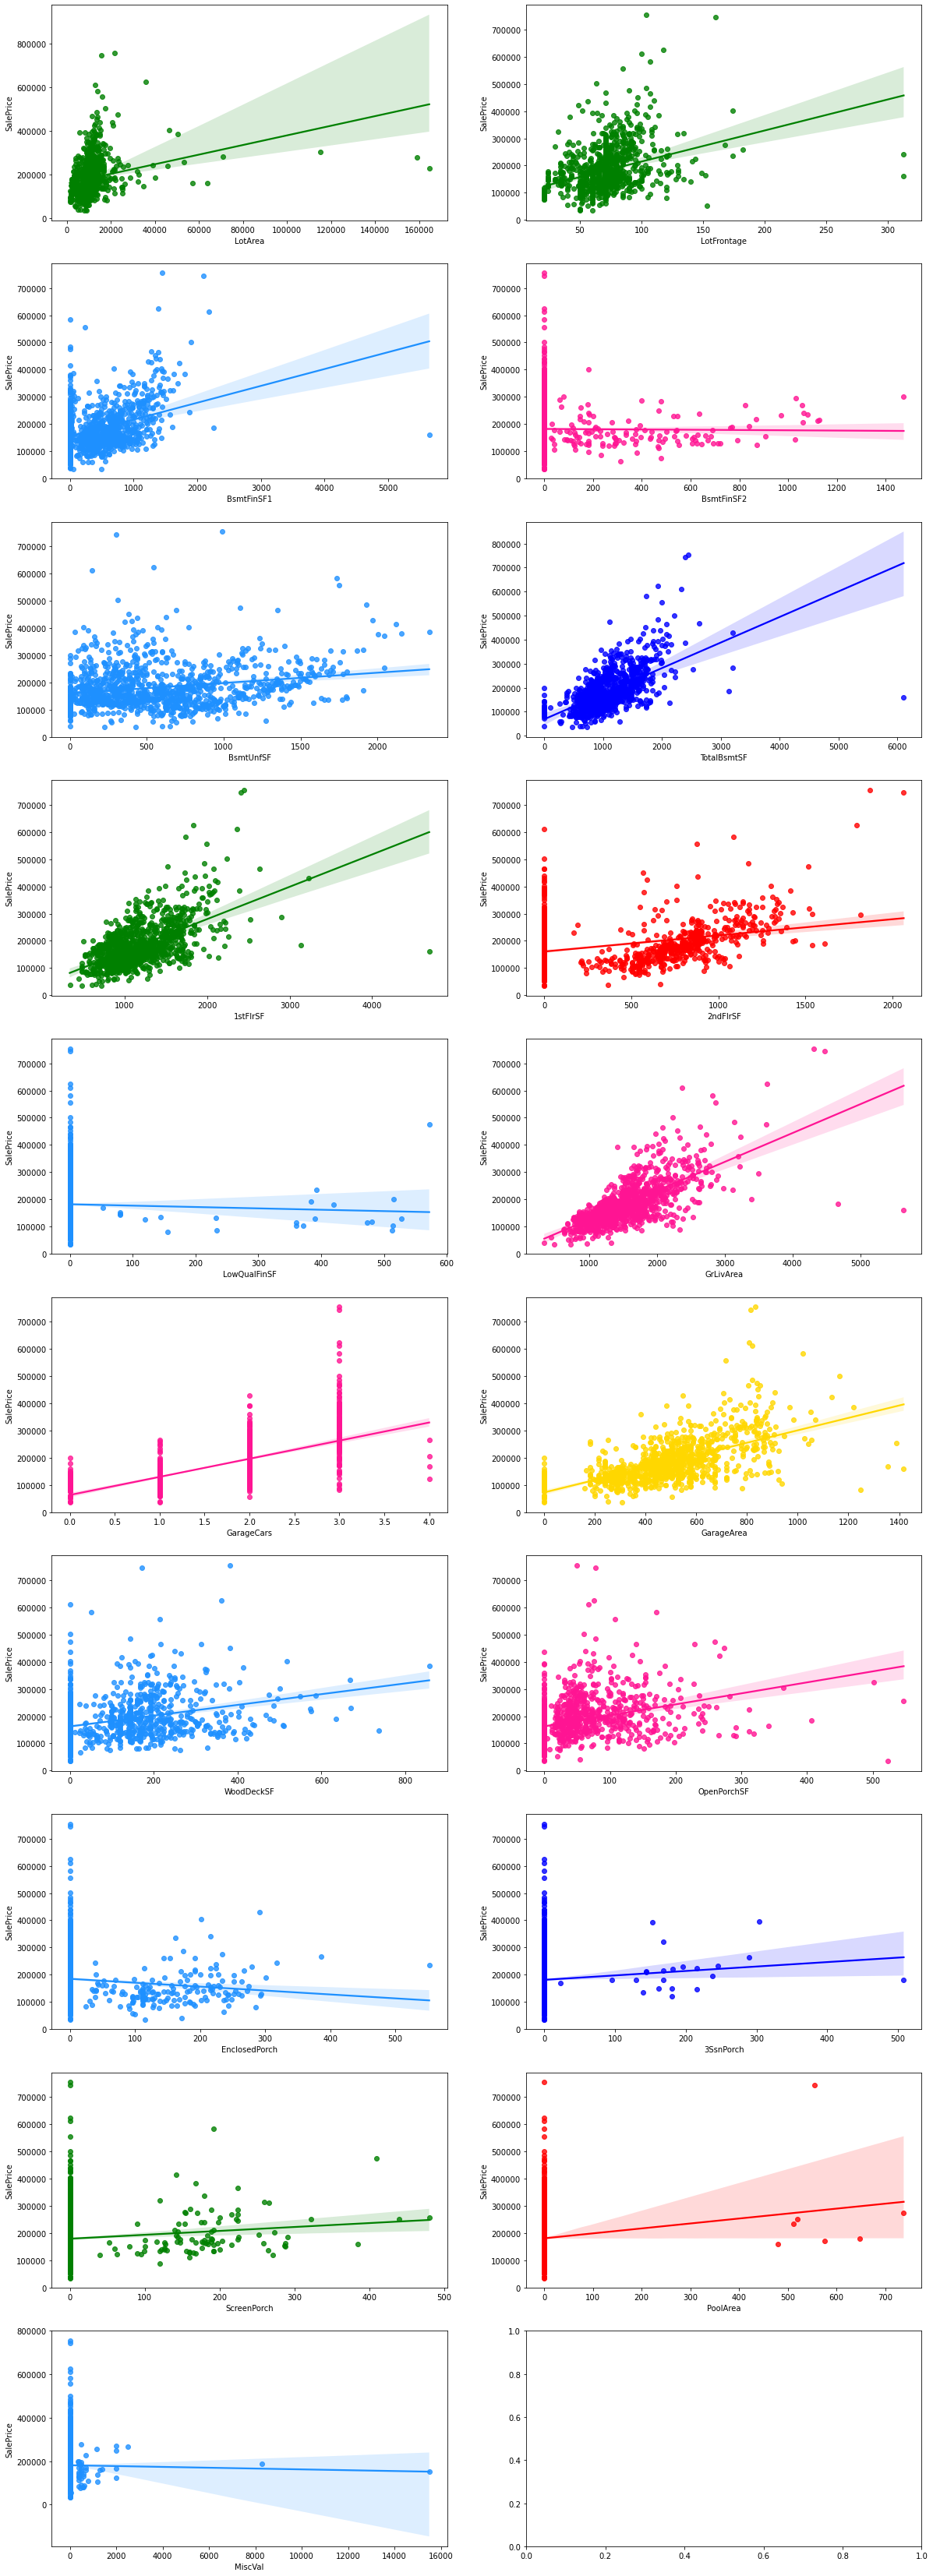

In [36]:
#checking  of numeric columns

fig, ((ax1, ax2), (ax3,ax4), (ax5, ax6),(ax7, ax8),( ax9,ax10),(ax11,ax12), (ax13, ax14),(ax15,ax16),(ax17,ax18),(ax19,ax20)) = plt.subplots(nrows=10, ncols=2, figsize = (20,60))



sns.regplot(x=train_df['LotArea'] , y=train_df['SalePrice'],color="g",ax=ax1)
sns.regplot(x=train_df['LotFrontage'] , y=train_df['SalePrice'],color="g",ax=ax2)

sns.regplot(x=train_df['BsmtFinSF1'] ,y=train_df['SalePrice'], color="dodgerblue",ax=ax3)
sns.regplot(x=train_df['BsmtFinSF2'] ,y=train_df['SalePrice'], color="deeppink",ax=ax4)
sns.regplot(x=train_df['BsmtUnfSF'] , y=train_df['SalePrice'],color="dodgerblue",ax=ax5)
sns.regplot(x=train_df['TotalBsmtSF'] , y=train_df['SalePrice'],color="b",ax=ax6)
sns.regplot(x=train_df['1stFlrSF'] , y=train_df['SalePrice'],color="g",ax=ax7)
sns.regplot(x=train_df['2ndFlrSF'] , y=train_df['SalePrice'],color="r",ax=ax8)
sns.regplot(x=train_df['LowQualFinSF'] , y=train_df['SalePrice'],color="dodgerblue",ax=ax9)
sns.regplot(x=train_df['GrLivArea'] , y=train_df['SalePrice'],color="deeppink",ax=ax10)
sns.regplot(x=train_df['GarageCars'] ,y=train_df['SalePrice'], color="deeppink",ax=ax11)
sns.regplot(x=train_df['GarageArea'] , y=train_df['SalePrice'],color="gold",ax=ax12)
sns.regplot(x=train_df['WoodDeckSF'] ,y=train_df['SalePrice'], color="dodgerblue",ax=ax13)
sns.regplot(x=train_df['OpenPorchSF'] , y=train_df['SalePrice'],color="deeppink",ax=ax14)
sns.regplot(x=train_df['EnclosedPorch'] , y=train_df['SalePrice'],color="dodgerblue",ax=ax15)
sns.regplot(x=train_df['3SsnPorch'] , y=train_df['SalePrice'],color="b",ax=ax16)
sns.regplot(x=train_df['ScreenPorch'] ,y=train_df['SalePrice'], color="g",ax=ax17)
sns.regplot(x=train_df['PoolArea'] , y=train_df['SalePrice'],color="r",ax=ax18)
sns.regplot(x=train_df['MiscVal'] , y=train_df['SalePrice'],color="dodgerblue",ax=ax19)

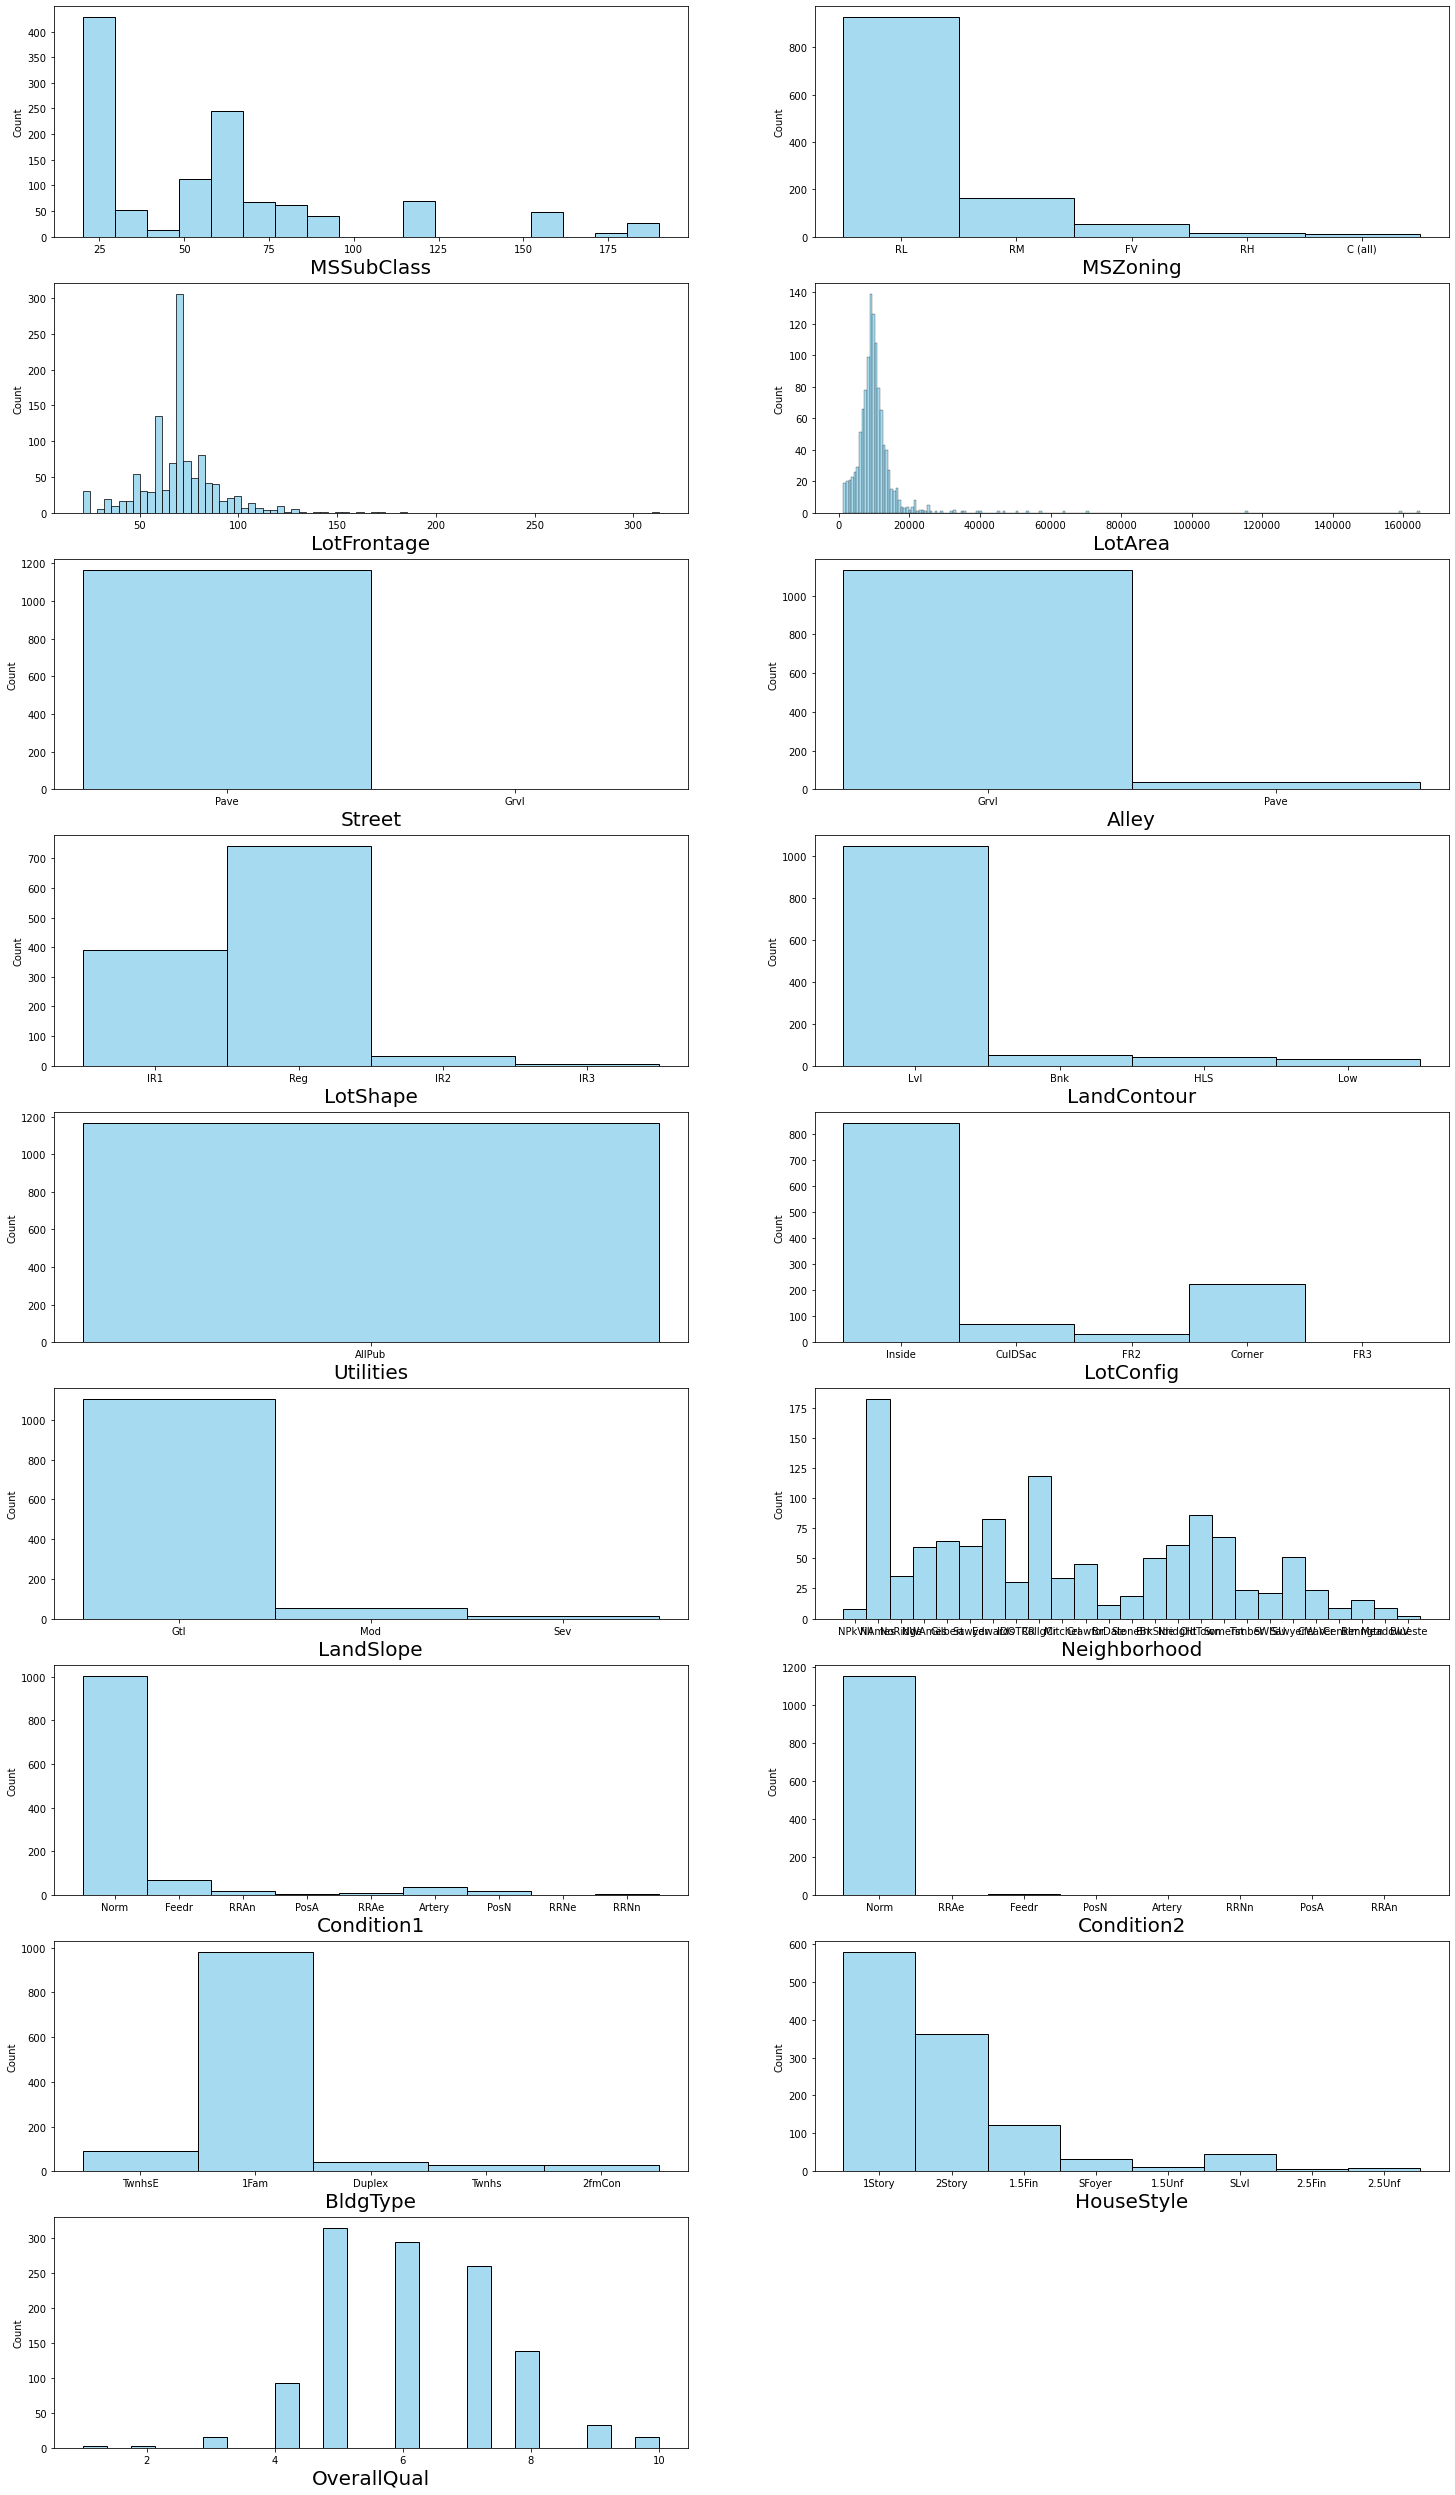

In [42]:
# using Histplot
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in train_df:
    if plotnumber <=17:
        ax = plt.subplot(10,2,plotnumber)
        sns.histplot(train_df[column], color = 'skyblue')
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

As per the above graphs we conclude that dataset having a outliers. 

# Skewness

In [45]:
train_df.skew()

MSSubClass               1.422019
LotFrontage              2.710383
LotArea                 10.659285
OverallQual              0.175082
OverallCond              0.580714
MasVnrArea               2.834658
BsmtFinSF1               1.871606
BsmtFinSF2               4.365829
BsmtUnfSF                0.909057
TotalBsmtSF              1.744591
1stFlrSF                 1.513707
2ndFlrSF                 0.823479
LowQualFinSF             8.666142
GrLivArea                1.449952
BsmtFullBath             0.627106
BsmtHalfBath             4.264403
FullBath                 0.057809
HalfBath                 0.656492
BedroomAbvGr             0.243855
KitchenAbvGr             4.365259
TotRmsAbvGrd             0.644657
Fireplaces               0.671966
GarageCars              -0.358556
GarageArea               0.189665
WoodDeckSF               1.504929
OpenPorchSF              2.410840
EnclosedPorch            3.043610
3SsnPorch                9.770611
ScreenPorch              4.105741
PoolArea      

Dataset contains a skewness in LotArea, MiscVal, PoolArea

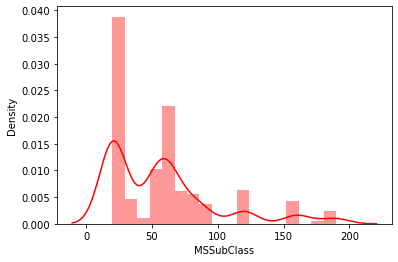

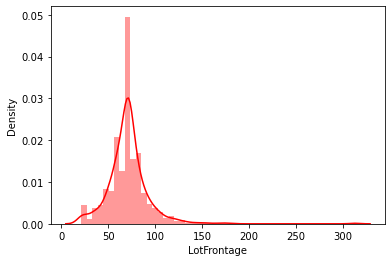

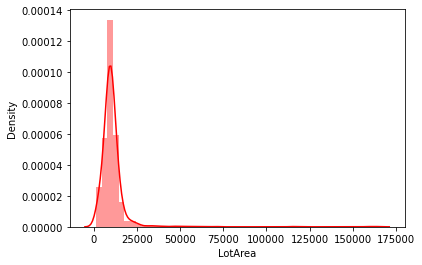

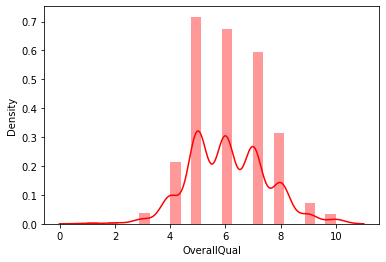

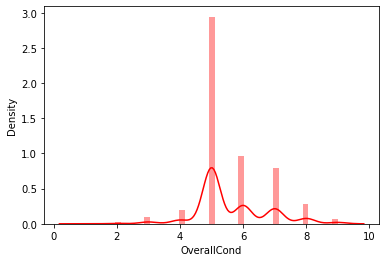

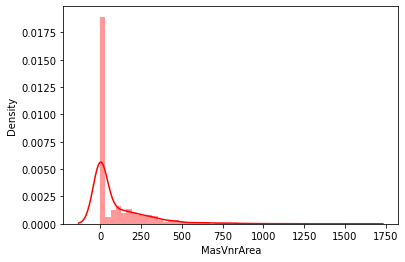

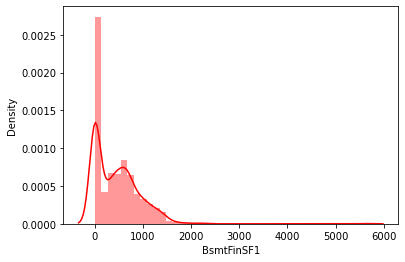

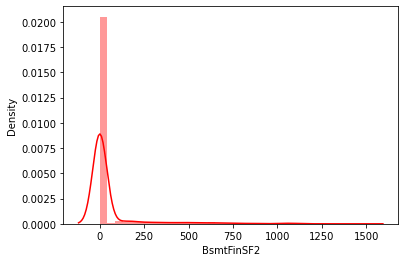

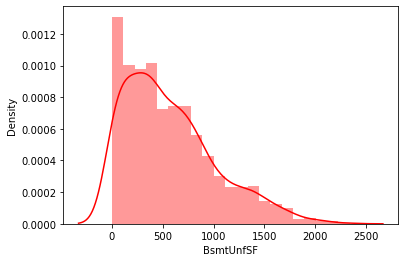

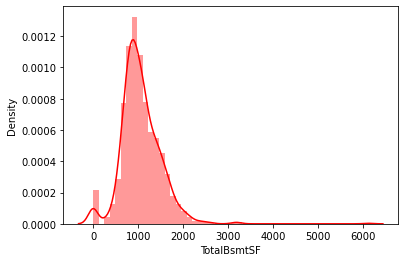

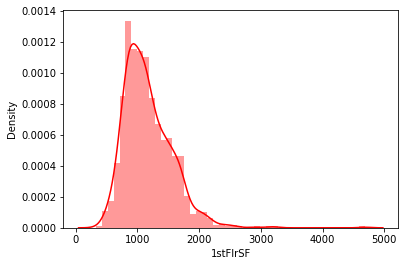

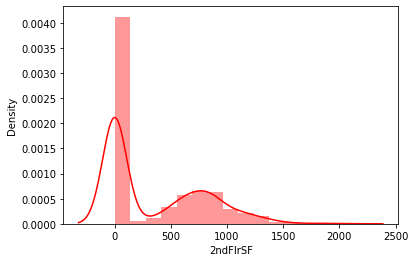

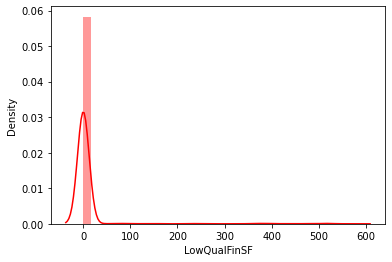

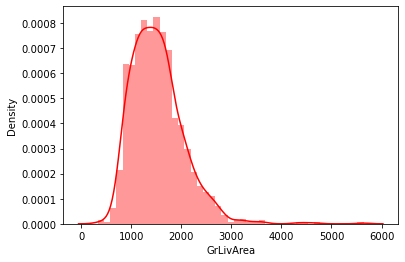

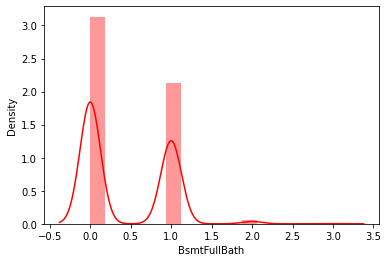

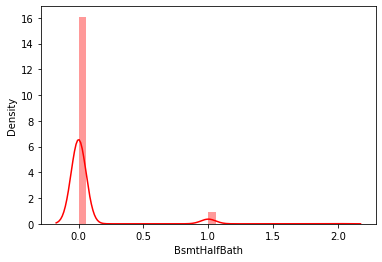

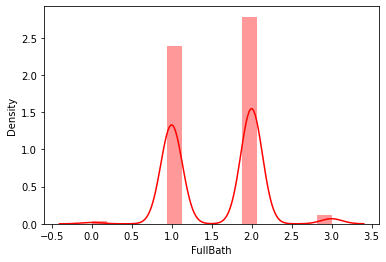

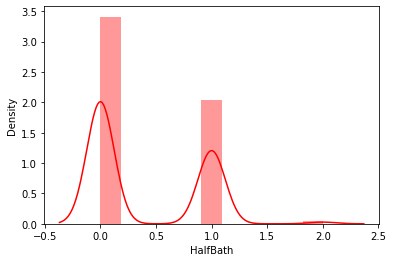

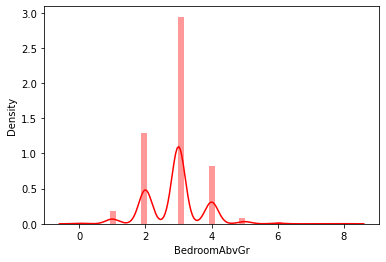

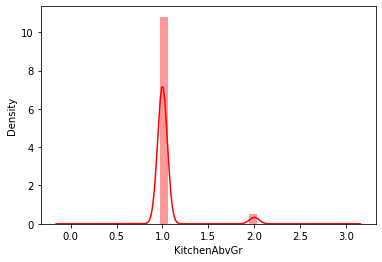

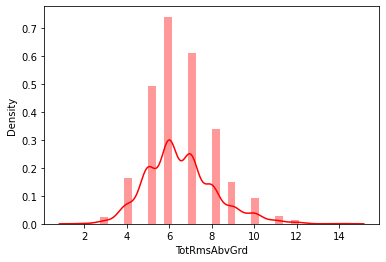

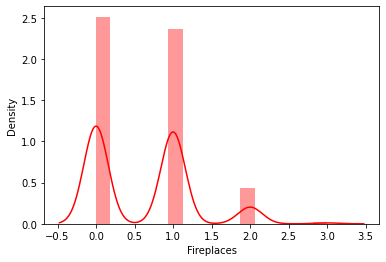

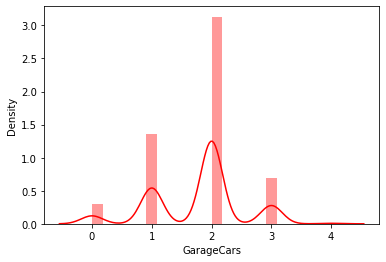

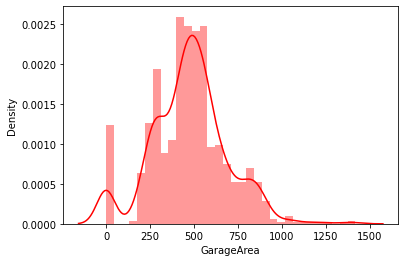

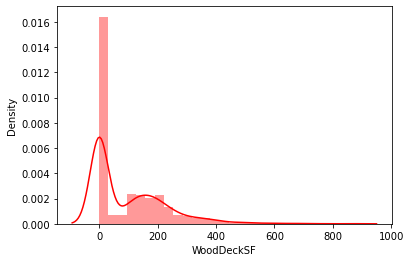

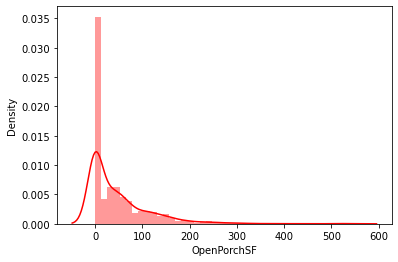

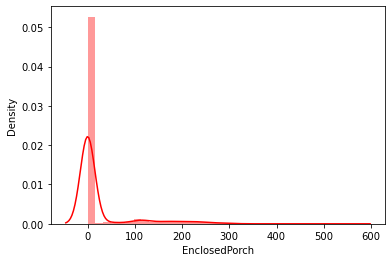

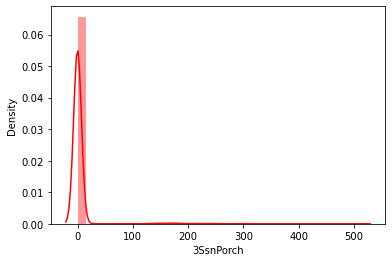

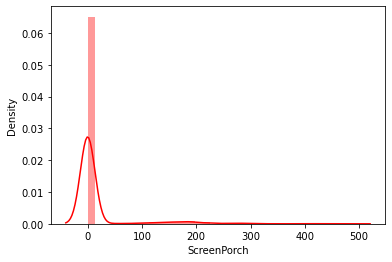

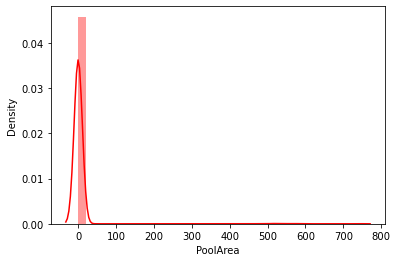

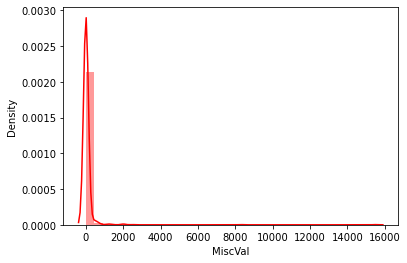

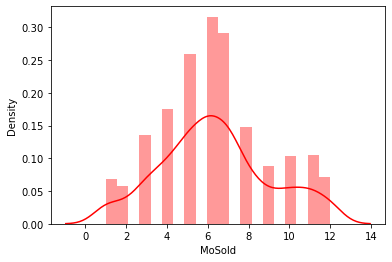

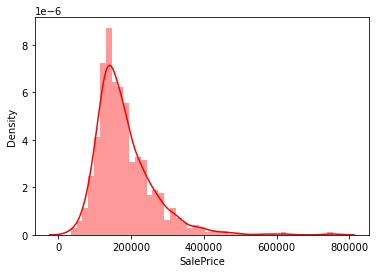

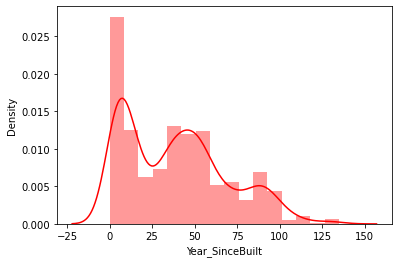

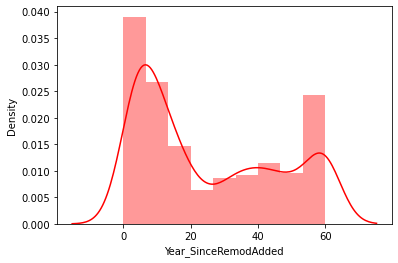

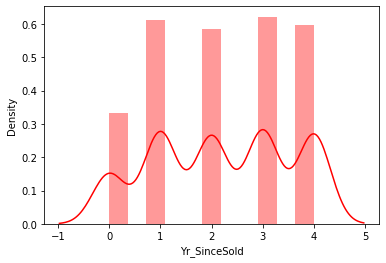

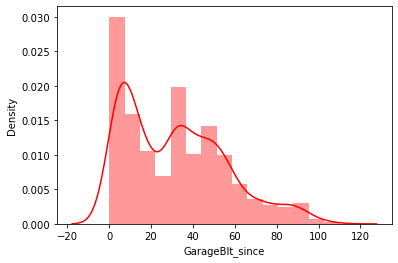

In [46]:
for i in train_df.describe().columns:
    sns.distplot(train_df[i],color='r')
    plt.show()

As per the above graphs we clearly see that data contain a skewness, so removing a skewness with squareroot and cube root.

In [48]:
#treating skewness with square root and cube root method
for column in train_df.skew().index:
    if train_df[column].skew()>0.55:
        train_df[column]=np.sqrt(train_df[column])
    if train_df[column].skew()<-0.55:
        train_df[column]=np.cbrt(train_df[column])

In [49]:
#treating skewness with square root and cube root method
for column in test_df.skew().index:
    if test_df[column].skew()>0.55:
        test_df[column]=np.sqrt(test_df[column])
    if test_df[column].skew()<-0.55:
        test_df[column]=np.cbrt(test_df[column])

In [50]:
train_df.skew()

MSSubClass               0.464768
LotFrontage              0.541796
LotArea                  1.346494
OverallQual              0.175082
OverallCond              0.045434
MasVnrArea               0.571940
BsmtFinSF1              -0.011789
BsmtFinSF2               2.596468
BsmtUnfSF               -0.233752
TotalBsmtSF             -5.862554
1stFlrSF                 0.380410
2ndFlrSF                 0.425547
LowQualFinSF             7.197209
GrLivArea                0.301870
BsmtFullBath             0.391353
BsmtHalfBath             3.962867
FullBath                 0.057809
HalfBath                 0.517616
BedroomAbvGr             0.243855
KitchenAbvGr           -26.260235
TotRmsAbvGrd             0.232956
Fireplaces               0.047671
GarageCars              -0.358556
GarageArea               0.189665
WoodDeckSF               0.458303
OpenPorchSF              0.033320
EnclosedPorch            2.103764
3SsnPorch                7.247740
ScreenPorch              3.128441
PoolArea      

Skewness is removed from dataset. 

# Outliers

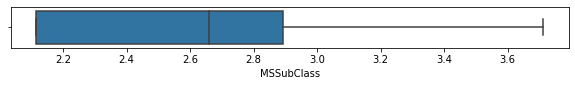

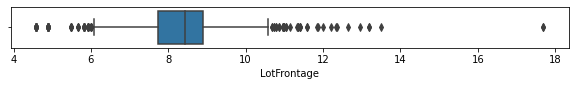

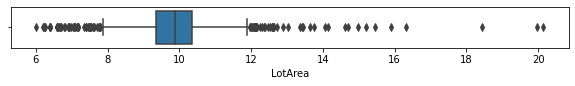

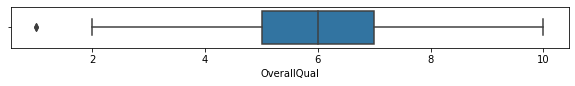

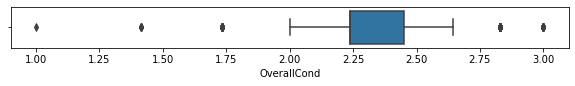

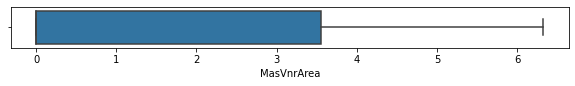

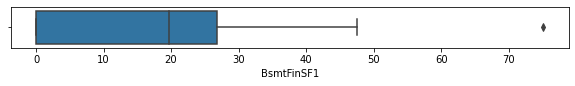

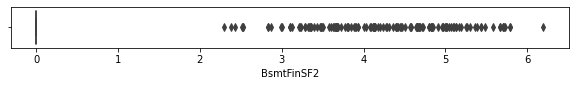

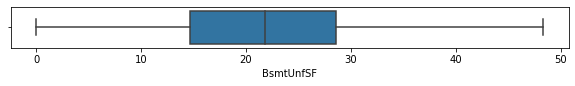

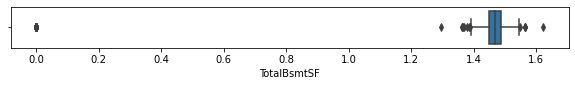

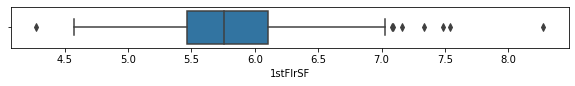

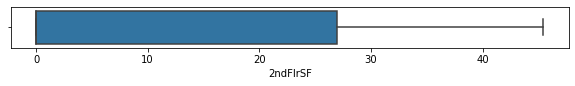

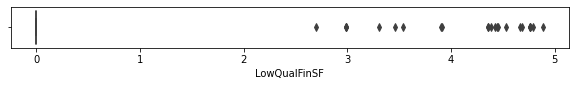

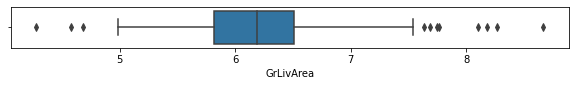

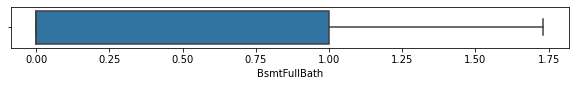

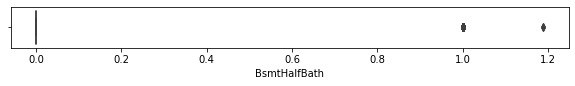

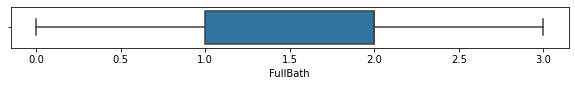

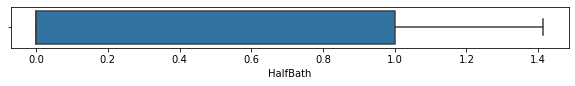

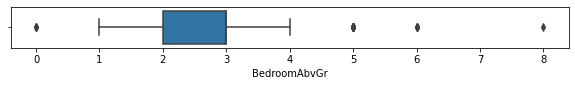

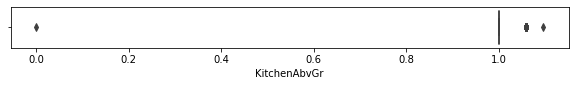

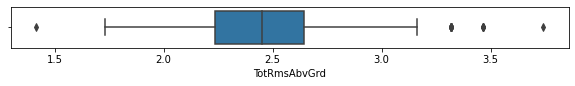

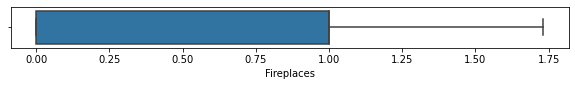

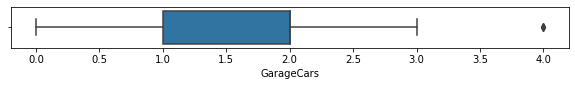

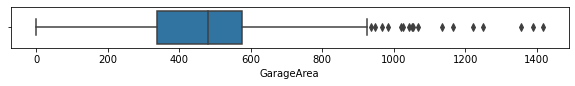

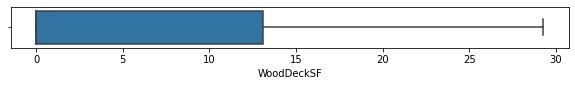

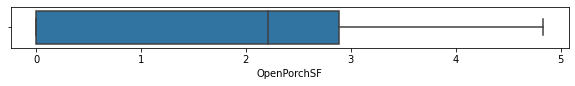

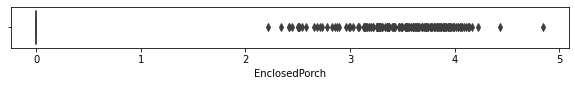

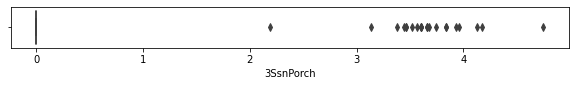

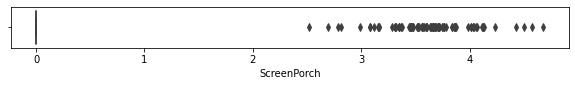

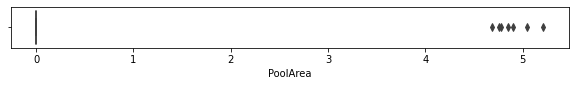

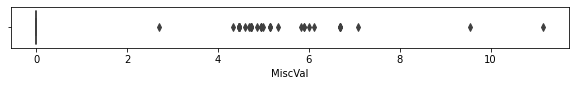

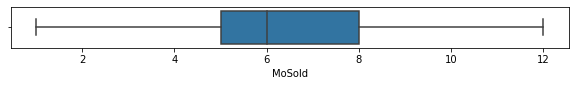

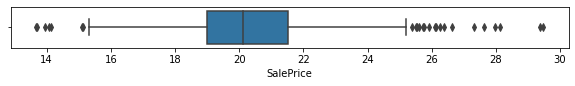

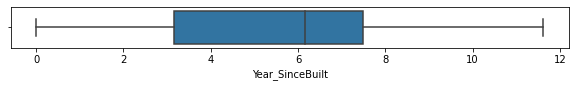

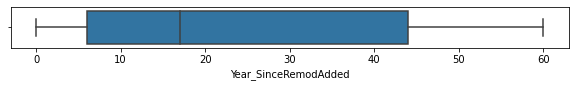

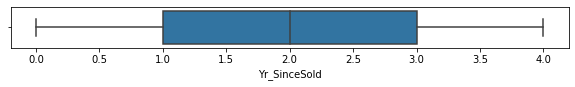

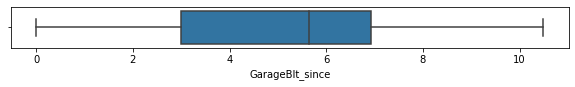

In [51]:
#checking the outlier with boxplot
df=train_df.columns
for i in df :
    if train_df[i].dtypes!="object":
        plt.figure(figsize=(10,8))
        plt.subplot(912)
        sns.boxplot(train_df[i])

As per the above graphs we see that dataset having a many outliers, to remove the outliers with IQR

In [52]:
#Making function to remove the outliers with IQR hypertuning
df=train_df.copy()
Q1=df.quantile(0.010)
Q3=df.quantile(0.99)
IQR=Q3-Q1
df_new=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
loss_=((len(df)-len(df_new))/len(df))*100
print(df_new.shape,df.shape)
print("Data Loss % is",loss_)

(1160, 79) (1168, 79)
Data Loss % is 0.684931506849315


In [53]:
#Making function to remove the outliers with IQR hypertuning
df_test=test_df.copy()
Q1=df_test.quantile(0.010)
Q3=df_test.quantile(0.99)
IQR=Q3-Q1
df_test_new=df_test[~((df_test<(Q1-1.5*IQR))|(df_test>(Q3+1.5*IQR))).any(axis=1)]
loss_=((len(df_test)-len(df_test_new))/len(df_test))*100
print(df_test_new.shape,df_test.shape)
print("Data Loss % is",loss_)

(286, 78) (292, 78)
Data Loss % is 2.054794520547945


# Label Encoder

In [54]:
#label encoder
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
d=df_new.columns
for i in d:
    if df_new[i].dtypes=='object':
        df_new[i]=l.fit_transform(df_new[i])

In [55]:
#label encoder
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
d=df_test_new.columns
for i in d:
    if df_test_new[i].dtypes=='object':
        df_test_new[i]=l.fit_transform(df_test_new[i])

# Seperating Input and Output Variables

In [56]:
#lets split the data
df_x1=df_new.drop(columns='SalePrice',axis=1)
y=df_new[['SalePrice']]

In [86]:
f=df_x1.columns
for i in f:
    if df_x1[i].dtypes!='object':
        if df_x1[i].skew()>0.55:
            df_x1[i]=np.sqrt(df_x1[i])

In [87]:
f=df_test_new.columns
for i in f:
    if df_test_new[i].dtypes!='object':
        if df_test_new[i].skew()>0.55:
            df_test_new[i]=np.sqrt(df_test_new[i])

In [88]:
df_x1.skew()

MSSubClass               0.473061
MSZoning                -1.791093
LotFrontage              0.169197
LotArea                  0.469747
Street                 -16.963119
Alley                    5.415725
LotShape                -0.609350
LandContour             -3.132850
Utilities                0.000000
LotConfig               -1.132874
LandSlope                3.947152
Neighborhood             0.040843
Condition1              -1.261129
Condition2              -2.616481
BldgType                 1.870124
HouseStyle               0.291954
OverallQual              0.156646
OverallCond              0.043415
RoofStyle               -1.562204
RoofMatl                 7.264324
Exterior1st             -0.612891
Exterior2nd             -0.594705
MasVnrType              -0.108314
MasVnrArea               0.432978
ExterQual               -1.810772
ExterCond               -2.530274
Foundation              -0.004215
BsmtQual                -1.346660
BsmtCond                -3.300486
BsmtExposure  

In [89]:
df_test_new.skew()

MSSubClass               0.519524
MSZoning                 0.172621
LotFrontage              0.148565
LotArea                  0.164205
Street                 -11.894934
Alley                    8.321035
LotShape                -0.658313
LandContour             -3.420522
Utilities               16.911535
LotConfig               -1.193954
LandSlope                4.202990
Neighborhood             0.052725
Condition1              -1.491130
Condition2              16.911535
BldgType                 1.639086
HouseStyle               0.288231
OverallQual              0.405166
OverallCond              0.618262
RoofStyle               -0.299920
RoofMatl                11.928979
Exterior1st             -0.651853
Exterior2nd             -0.682643
MasVnrType               0.049379
MasVnrArea               0.474724
ExterQual               -1.890655
ExterCond               -3.633431
Foundation               0.080639
BsmtQual                -1.334322
BsmtCond                -5.049316
BsmtExposure  

# Scalling

In [90]:
#scalling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x1=sc.fit_transform(df_x1)
df_x=pd.DataFrame(x1,columns=df_x1.columns)
df_x.shape

(1160, 78)

In [91]:
#scalling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
test_x1=sc.fit_transform(df_test_new)
df_test_x=pd.DataFrame(test_x1,columns=df_test_new.columns)
df_test_x.shape

(286, 78)

In [92]:
df_x.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,Year_SinceBuilt,Year_SinceRemodAdded,Yr_SinceSold,GarageBlt_since
0,1.475334,-0.021721,0.090686,-1.201052,0.058824,-0.178965,-1.376601,0.318123,0.0,0.602754,...,0.253503,0.048994,-0.191333,-1.622714,0.330332,0.202265,0.060413,0.420272,0.612050,0.259571
1,-1.078393,-0.021721,1.171450,1.120241,0.058824,-0.178965,-1.376601,0.318123,0.0,0.602754,...,0.253503,0.048994,-0.191333,1.361588,0.330332,0.202265,0.248075,0.708487,0.612050,0.512157
2,0.350007,-0.021721,1.044562,0.147029,0.058824,-0.178965,-1.376601,0.318123,0.0,-1.229197,...,0.253503,0.048994,-0.191333,-0.130563,0.330332,0.202265,-0.733909,-0.588480,0.612050,-0.671964
3,-1.078393,-0.021721,1.580547,0.491528,0.058824,-0.178965,-1.376601,0.318123,0.0,0.602754,...,0.253503,0.048994,-0.191333,-1.995752,-4.598094,0.202265,0.027569,0.372236,-1.646628,0.259571
4,-1.078393,-0.021721,0.090686,1.221679,0.058824,-0.178965,-1.376601,0.318123,0.0,-0.618547,...,0.253503,0.048994,-0.191333,-0.130563,0.330332,0.202265,0.027569,-0.732587,-0.893736,0.259571


In [93]:
df_test_x.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,Year_SinceBuilt,Year_SinceRemodAdded,Yr_SinceSold,GarageBlt_since
0,-1.050008,-0.28455,1.084720,0.937231,0.083918,-0.119098,-1.414641,-2.634245,-0.059235,-1.996938,...,0.210183,0.059235,-0.180093,0.288868,0.232823,0.150240,-1.234441,-1.020154,0.639702,-1.227074
1,1.423649,-0.28455,0.042170,-0.797809,0.083918,-0.119098,-1.414641,0.291557,-0.059235,-1.347195,...,0.210183,0.059235,-0.180093,0.651220,-6.425907,-3.287257,-0.124181,0.070553,-0.866098,0.041549
2,-1.050008,-0.28455,0.042170,0.556790,0.083918,-0.119098,0.737419,0.291557,-0.059235,0.602035,...,0.210183,0.059235,-0.180093,-0.073484,0.232823,0.150240,-0.927851,-0.772266,-0.866098,-0.888563
3,0.559959,-0.28455,0.498865,0.585102,0.083918,-0.119098,0.737419,-4.097147,-0.059235,0.602035,...,0.210183,0.059235,-0.180093,0.288868,0.232823,0.150240,1.077198,1.756190,-0.866098,1.462893
4,0.333606,-0.28455,1.084720,1.004191,0.083918,-0.119098,-1.414641,0.291557,-0.059235,-1.347195,...,0.210183,0.059235,-0.180093,-1.885243,0.232823,0.150240,-1.451233,-1.069731,-0.113198,-1.450413


# Principle Component Anaylsis

In [94]:
#pca
from sklearn.decomposition import PCA
cover_matrix=PCA(n_components=len(df_x.columns))
cover_matrix.fit(df_x)

PCA(n_components=78)

In [95]:
#pca
from sklearn.decomposition import PCA
cover_matrix=PCA(n_components=len(df_test_x.columns))
cover_matrix.fit(df_test_x)

PCA(n_components=78)

In [96]:
pc=PCA(n_components=20)
x1=pc.fit_transform(df_x)
df_x=pd.DataFrame(x1)

In [97]:
pc=PCA(n_components=20)
test_x1=pc.fit_transform(df_test_x)
df_test_x=pd.DataFrame(test_x1)

In [98]:
df_x.shape

(1160, 20)

In [99]:
df_test_x.shape

(286, 20)

# Finding Best Random State

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_Score=0
maxRS=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(df_x,y,test_size=.30,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    score = r2_score(y_test, predrf)
    if score>maxR2_Score:
        maxR2_Score=score
        maxRS=i
print("Best accuracy is",maxR2_Score," on Random_state ",maxRS)

Best accuracy is 0.9113837734325645  on Random_state  701


In [101]:
#Train Test Split

In [102]:
x_train,x_test,y_train,y_test=train_test_split(df_x,y,test_size=.30,random_state=maxRS)

# Model building

In [103]:
#importing all the required libraries to find best Algorithm
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [104]:
model=[LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),GradientBoostingRegressor(),Ridge(),SVR()]
for m in model:
    print("*******************************************************************************")
    print('accuracy score of ->', m)
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    print("R2 Score:                ", r2_score(y_test,pred))
    print("Mean Absolute Error:     ", mean_absolute_error(y_test,pred))
    print("Mean Squared error:      ", mean_squared_error(y_test,pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred)))
    score=cross_val_score(m,df_x,y,cv=8)
    print(score)
    print("cross validation score:  ",score.mean())
    print("Difference between R2 score and cross validatio score is - ",r2_score(y_test,pred)-abs(score.mean()))
    print("*******************************************************************************")

*******************************************************************************
accuracy score of -> LinearRegression()
R2 Score:                 0.9113837734325645
Mean Absolute Error:      0.47784883608422013
Mean Squared error:       0.42284386724508316
Root Mean Squared Error:  0.6502644594663645
[0.90727752 0.89210579 0.82948024 0.84882482 0.87421068 0.88186246
 0.85334359 0.85028035]
cross validation score:   0.867173182946023
Difference between R2 score and cross validatio score is -  0.04421059048654152
*******************************************************************************
*******************************************************************************
accuracy score of -> RandomForestRegressor()
R2 Score:                 0.8862569560623512
Mean Absolute Error:      0.5344597755047049
Mean Squared error:       0.5427397490709321
Root Mean Squared Error:  0.7367087274295943
[0.880604   0.8800722  0.84128969 0.83891715 0.82659683 0.86085467
 0.8441217  0.86136286]
cross v

As per the above model building data we conculude that Ridge and LinearRegression is the best model according with the accuracy of 91.13% and having cross validation score is 86.71%

# Hyper Parameter Tuning

In [78]:
#import the randomized search CV
from sklearn.model_selection import RandomizedSearchCV
parameters = {"n_estimators":[100,200,300,400,500,600,700,800],
              "max_depth":[1,2,3,4,5,6,7,8,9,10,15,20],
              "max_features": [3,5,7,9],
              "min_samples_leaf":[2,3,4,5,6],
              "max_features":['auto','sqrt'],
              "min_samples_split":[2,5,8,10,12,18]}

In [79]:
clf = RandomizedSearchCV(RandomForestRegressor(), parameters, cv=8)
clf.fit(x_train, y_train)
clf.best_params_  #Best parameters

{'n_estimators': 700,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 9}

In [80]:
clf_pred = clf.best_estimator_.predict(x_test)

r2_score(y_test, clf_pred)

0.8866352330956446

# Saving the model

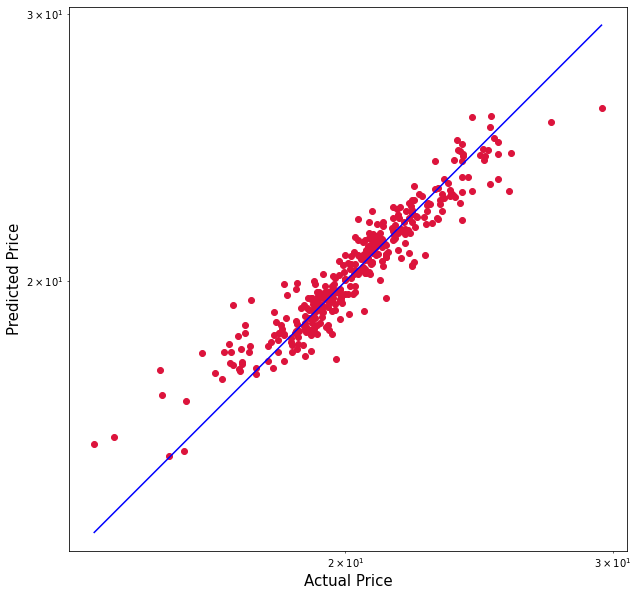

In [81]:
import joblib
joblib.dump(clf.best_estimator_,"Housing.obj")
RF_from_joblib=joblib.load('Housing.obj')
Predicted = RF_from_joblib.predict(x_test)
plt.figure(figsize=(10,10))
plt.scatter(y_test, Predicted, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(Predicted), max(y_test.max(axis=1)))
p2 = min(min(Predicted), min(y_test.min(axis=1)))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Price', fontsize=15)
plt.ylabel('Predicted Price', fontsize=15)
plt.axis('equal')
plt.show()